<a href="https://colab.research.google.com/github/raklives/personal-projects/blob/master/facebook_ads_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import pandas library
import pandas as pd

In [0]:
# import some libraries from matplotlib 
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

In [42]:
# read in the data
# set index as 'reporting sts'
ads = pd.read_csv('facebook-data-ads.csv', index_col='Reporting starts')

# check datafram
ads.head()

,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
Reporting starts,,,,,,,,,,,,,,
2014-02-21,2018-01-29,NaN,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
2015-12-04,2015-12-04,Plus Size - Icon Test,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2015-10-21,2015-10-21,Instagram - DietBrands,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2015-10-20,2015-10-20,Instagram - DietBrands,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
2015-10-20,2015-10-20,PlusSize - Instagram,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# get information on the data fram
ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 2014-02-21 to 2014-02-21
Data columns (total 14 columns):
Reporting ends                           1381 non-null object
Campaign name                            1380 non-null object
Delivery                                 1381 non-null object
Mobile app installs                      702 non-null float64
Mobile app actions                       0 non-null float64
Cost per mobile app install (GBP)        702 non-null float64
Cost per mobile app action (GBP)         0 non-null float64
Desktop app installs                     0 non-null float64
Desktop app engagement                   0 non-null float64
Cost per desktop app install (GBP)       0 non-null float64
Cost per desktop app engagement (GBP)    0 non-null float64
Post reactions                           428 non-null float64
Post comments                            38 non-null float64
Post shares                              105 non-null float64
dtypes: float64(11), object(

In [44]:
 # get descriptive stats
 ads.describe()

 # observations
 # we have some columns with no values

,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
count,702.000000,0.0,702.000000,0.0,0.0,0.0,0.0,0.0,428.000000,38.000000,105.000000
mean,32.623932,NaN,1.835697,NaN,NaN,NaN,NaN,NaN,8.443925,2.210526,2.533333
std,431.906352,NaN,1.446592,NaN,NaN,NaN,NaN,NaN,87.367479,6.637966,12.866225
min,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000
50%,10.000000,NaN,1.500000,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,1.000000
75%,26.000000,NaN,2.410000,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,1.000000
max,11451.000000,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,1807.000000,42.000000,133.000000


### Dropping NaN Values

In [45]:
# look at the columns you have, to select the ones you want to drop
ads.columns

Index(['Reporting ends', 'Campaign name', 'Delivery', 'Mobile app installs',
       'Mobile app actions', 'Cost per mobile app install (GBP)',
       'Cost per mobile app action (GBP)', 'Desktop app installs',
       'Desktop app engagement', 'Cost per desktop app install (GBP)',
       'Cost per desktop app engagement (GBP)', 'Post reactions',
       'Post comments', 'Post shares'],
      dtype='object')

In [0]:
# select the ones you want to drop
ads.drop(['Delivery', 'Mobile app actions', 'Cost per mobile app action (GBP)', 
          'Desktop app installs', 'Desktop app engagement', 'Cost per desktop app install (GBP)', 
          'Cost per desktop app engagement (GBP)'], axis=1, inplace=True)

In [49]:
# check
ads.head()

,Reporting ends,Campaign name,Mobile app installs,Cost per mobile app install (GBP),Post reactions,Post comments,Post shares
Reporting starts,,,,,,,
2014-02-21,2018-01-29,NaN,11451.0,1.275683,1807.0,42.0,133.0
2015-12-04,2015-12-04,Plus Size - Icon Test,NaN,NaN,2.0,NaN,NaN
2015-10-21,2015-10-21,Instagram - DietBrands,2.0,3.530000,2.0,NaN,NaN
2015-10-20,2015-10-20,Instagram - DietBrands,2.0,16.500000,15.0,NaN,NaN
2015-10-20,2015-10-20,PlusSize - Instagram,NaN,NaN,NaN,NaN,NaN


In [0]:
# replace NaN values
ads.fillna(0, inplace=True)

In [53]:
# check
ads.head(10)

,Reporting ends,Campaign name,Mobile app installs,Cost per mobile app install (GBP),Post reactions,Post comments,Post shares
Reporting starts,,,,,,,
2014-02-21,2018-01-29,0,11451.0,1.275683,1807.0,42.0,133.0
2015-12-04,2015-12-04,Plus Size - Icon Test,0.0,0.000000,2.0,0.0,0.0
2015-10-21,2015-10-21,Instagram - DietBrands,2.0,3.530000,2.0,0.0,0.0
2015-10-20,2015-10-20,Instagram - DietBrands,2.0,16.500000,15.0,0.0,0.0
2015-10-20,2015-10-20,PlusSize - Instagram,0.0,0.000000,0.0,0.0,0.0
2015-10-19,2015-10-19,PlusSize - Instagram,17.0,0.882353,27.0,1.0,0.0
2015-10-19,2015-10-19,Instagram - DietBrands,2.0,6.600000,15.0,0.0,0.0
2015-10-18,2015-10-18,PlusSize - Instagram,30.0,1.100000,71.0,0.0,0.0
2015-10-17,2015-10-17,Magazines,1.0,7.570000,0.0,0.0,0.0


### Rename The Columns

In [52]:
# see the columns, so you know what you want to change
ads.columns

Index(['Reporting ends', 'Campaign name', 'Mobile app installs',
       'Cost per mobile app install (GBP)', 'Post reactions', 'Post comments',
       'Post shares'],
      dtype='object')

In [0]:
# rename columns
# you use the .rename function
# set inplace as true to make change permanent
ads.rename(columns={'Reporting starts':'starts', 'Reporting ends':'ends', 
                    'Campaign name':'campname', 'Mobile app installs':'installs', 
                    'Cost per mobile app install (GBP)':'cpi', 'Post comments':'pst_comm',
                    'Post shares':'pst_share'}, inplace=True)

In [61]:
# check changes
ads.head()

,ends,campname,installs,cpi,Post reactions,pst_comm,pst_share
Reporting starts,,,,,,,
2014-02-21,2018-01-29,0,11451.0,1.275683,1807.0,42.0,133.0
2015-12-04,2015-12-04,Plus Size - Icon Test,0.0,0.000000,2.0,0.0,0.0
2015-10-21,2015-10-21,Instagram - DietBrands,2.0,3.530000,2.0,0.0,0.0
2015-10-20,2015-10-20,Instagram - DietBrands,2.0,16.500000,15.0,0.0,0.0
2015-10-20,2015-10-20,PlusSize - Instagram,0.0,0.000000,0.0,0.0,0.0


### Time Series Data


In [0]:
# here we're looking for time stamps and setting them as time stamps
# convert 'rends columns' to date time series
ads['ends'] = pd.to_datetime(ads['ends'])

In [68]:
# check
ads.info()

# we can see the change 

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 2014-02-21 to 2014-02-21
Data columns (total 7 columns):
ends              1381 non-null datetime64[ns]
campname          1381 non-null object
installs          1381 non-null float64
cpi               1381 non-null float64
Post reactions    1381 non-null float64
pst_comm          1381 non-null float64
pst_share         1381 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 126.3+ KB


### Charting our data

In [0]:
# sort the data by index, so everything is in chronological order
ads.sort_index(inplace=True)

In [0]:
# save sorted index to variable
# so when we graph using the index as time, we can graph with it as an x or y variable
period = ads.index

# save the cpi column to a variable. making it easier to call
cpi = ads.cpi
# 

In [0]:
# Time to graph

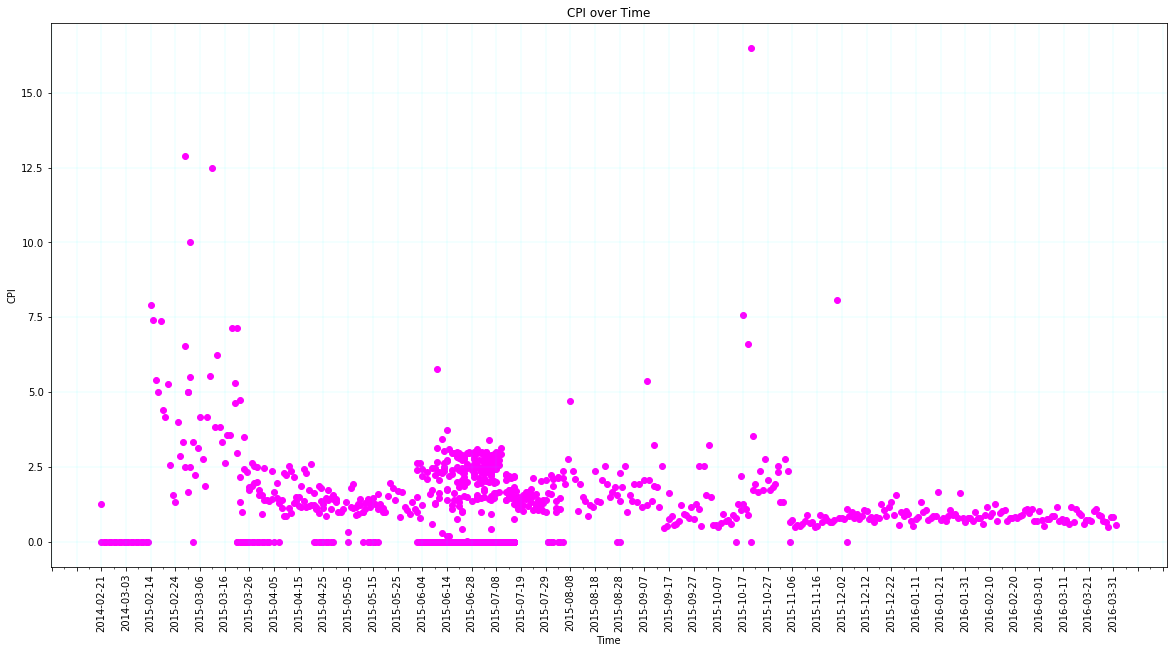

In [77]:
# set the figure 
fig, ax = plt.subplots(figsize=(20,10))

# use that information to create a scatter plot
# use period and cpi variables that we just created
ax.scatter(period, cpi, color='magenta')

# format the axes 
ax.set_xlabel('Time')
ax.set_ylabel('CPI')
ax.set_title('CPI over Time')
plt.xticks(rotation='vertical') # sets rotation of the x axis values
ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) # distance between the ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5)); 

ax.grid(color='cyan', linestyle='-',linewidth=0.09)

plt.show()

### Using Seaborn

In [0]:
# import seaborn library
import seaborn as sns

In [0]:
# creating a new variable
ads_corr = ads.corr()

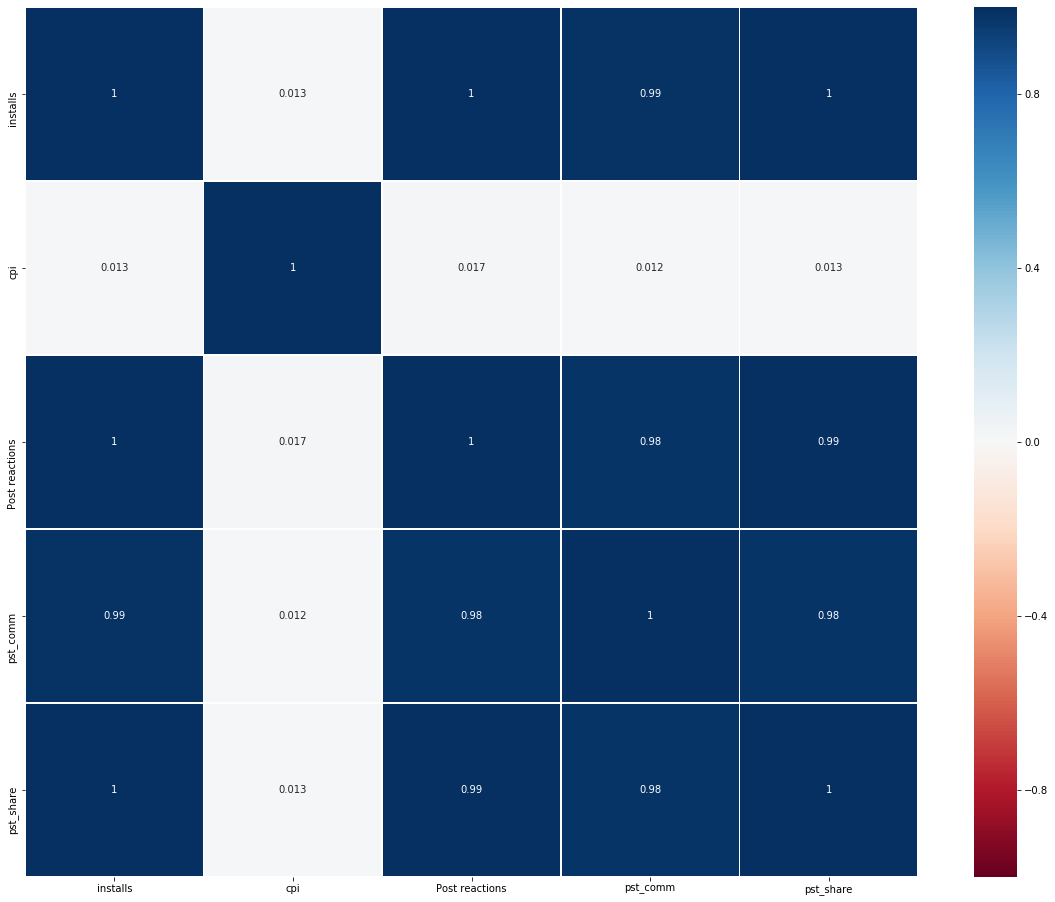

In [81]:
# set up your plot
# notice that it requires less code
plt.figure(figsize=(20,16))
sns.heatmap(
    ads_corr, 
    linewidth=0.5, 
    cmap='RdBu', 
    vmin=-1, vmax=1, annot=True
);